# Mixture of Gaussians with Tensorflow Probability

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_probability as tfp
import tensorflow as tf
tfd = tfp.distributions

First of all, let's define the parameters of the problem to be solved.

In [2]:
sample_size = 20000 # Number of experiments we will perform
n_throws = 10 # Number of times each coin is flipped
m_heads = 3 # Number of heads obtained

Define the Mixture of Beta distributions

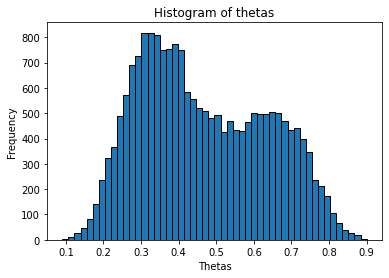

In [3]:
# Generate the thetas given from the Mixture of the three Beta distributions
gmm = tfd.Mixture(
    cat=tfd.Categorical(probs=[0.5, 0.2, 0.3]),
    components=[
        tfd.Beta(10,20),
        tfd.Beta(15,15),
        tfd.Beta(20,10),
    ]
)
thetas = gmm.sample(sample_size)

# Simulated prior
plt.title('Histogram of thetas')
plt.xlabel('Thetas')
plt.ylabel('Frequency')
plt.hist(thetas, bins=50, ec='black')
plt.show()

Flip a coin `m` times and output the frequency of heads and the priopr predictive pmf for the simulation

In [4]:
# Number of heads in m trials
heads = tf.cast(tfd.Binomial(n_throws, probs=thetas).sample(), tf.int32)

In [5]:
# Group by the number of heads
unique, counts = np.unique(heads.numpy(), return_counts=True)
heads_table = pd.DataFrame({
    'counts': counts, 
    'frequency': counts/sample_size
    }, index=pd.Index(unique, name='heads'))

In [6]:
print("Absolute Frequencies")
heads_table[['counts']].T

Absolute Frequencies


heads,0,1,2,3,4,5,6,7,8,9,10
counts,319,1190,2214,2940,3131,2912,2714,2159,1515,708,198


In [7]:
print("Relative Frequencies")
heads_table[['frequency']].T

Relative Frequencies


heads,0,1,2,3,4,5,6,7,8,9,10
frequency,0.01595,0.0595,0.1107,0.147,0.15655,0.1456,0.1357,0.10795,0.07575,0.0354,0.0099


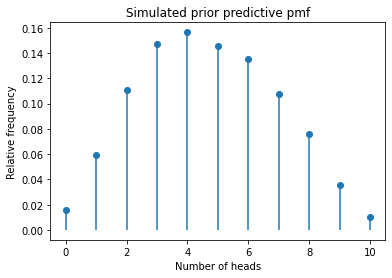

In [8]:
plt.xlabel('Number of heads')
plt.ylabel('Relative frequency')
plt.title('Simulated prior predictive pmf')
plt.stem(heads_table.index, heads_table['frequency'], basefmt=" ")
plt.show()

Finally, with the aim to study the probability of having $m=3$ heads given theta, all cases resulting in $m=3$ heads are picked and the histogram of thetas producing `m` heads is plotted.

Number of times we get 3 heads: 2940
Proportion of samples with m=3 heads:  0.147


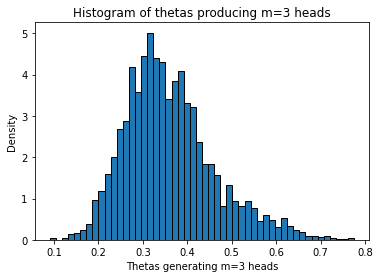

In [74]:
# Cases in which we get m=3 heads
num_m_heads_heads = heads_table.loc[m_heads, 'counts']
print('Number of times we get {} heads: {}'.format(m_heads, num_m_heads_heads))

# Proportion of cases in which we get m=3 heads
print("Proportion of samples with m=3 heads: ", heads_table.loc[m_heads, 'frequency'])

# Thetas that have generated m=3 heads
thetas_m_heads = thetas[heads == m_heads]

# The histogram shows the theta values generating m=3 heads
plt.title('Histogram of thetas producing m=3 heads')
plt.xlabel('Thetas generating m=3 heads')
plt.ylabel('Density')
hist = plt.hist(thetas_m_heads, bins=50, ec='black', density=True)
plt.show()

Given this experiments, we can make the **analysis of the posterior quantities**.

### MAP estimator of $\theta$
Given the simulation performed before, we can estimate the MAP as the theta value with maximal density.

MAP:  0.30966967


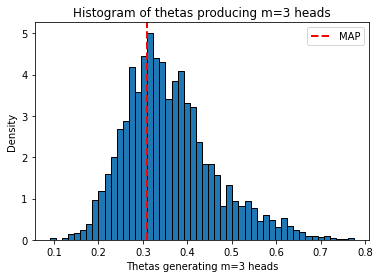

In [75]:
# Finding the maximum a posteriori (MAP)
# Finding MAP
theta_MAP = hist[1][np.argmax(hist[0])]
print("MAP: ", theta_MAP)
# Plot over histogram
plt.title('Histogram of thetas producing m=3 heads')
plt.xlabel('Thetas generating m=3 heads')
plt.ylabel('Density')
plt.hist(thetas_m_heads, bins=50, ec='black', density=True)
plt.axvline(theta_MAP, color='red', linestyle='dashed', linewidth=2, label='MAP')
plt.legend()
plt.show()

### Posterior Expectation
Again, the simulation allows us to compute the posterior expectation as shown in the following cell.

In [83]:
# Simulated Expectation 
print("Simulation based posterior expectation: ", tf.reduce_mean(thetas_m_heads).numpy())

Simulation based posterior expectation:  0.35975873


### Posterior Variance
And also the posterior variance as shown in the following cell.

In [87]:
# Simulated Variance
print("Simulation based posterior variance: ", tf.math.reduce_variance(thetas_m_heads).numpy())

Simulation based posterior variance:  0.010362837
